In [1]:
# Import libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import re 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data

In [5]:
df = pd.read_csv('Elon_musk.csv', encoding = 'latin1', index_col = 0)
df

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
# Remove patterns in the input text

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r: 
        input_txt = re.sub(word, "", input_txt)
        return input_txt

In [8]:
# Remove twitter handles

In [9]:
df['Clean_txt'] = np.vectorize(remove_pattern)(df['Text'], "@[\w]*")
df

,Text,Clean_txt
1,@kunalb11 Im an alien,Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
3,@joerogan @Spotify Great interview!,@Spotify Great interview!
4,@gtera27 Doge is underestimated,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...","True, it sounds so surreal, but the negative ..."
1996,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms &amp; conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,@PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is <U+0001F525><U+0001F...


In [10]:
# Remove special characters, symbols, punctuations

In [11]:
df['Clean_txt'] = df['Clean_txt'].str.replace("[^a-zA-Z]"," ")
df

,Text,Clean_txt
1,@kunalb11 Im an alien,I m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next lev...
3,@joerogan @Spotify Great interview!,Spotify Great interview
4,@gtera27 Doge is underestimated,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",True it sounds so surreal but the negative ...
1996,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms amp conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is U F U F...


In [12]:
# Remove links

In [13]:
df['Clean_txt'] = df['Clean_txt'].str.replace('http[^\s][^s]+', " ")
df

,Text,Clean_txt
1,@kunalb11 Im an alien,I m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next lev...
3,@joerogan @Spotify Great interview!,Spotify Great interview
4,@gtera27 Doge is underestimated,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",True it sounds so surreal but the negative ...
1996,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms amp conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is U F U F...


In [14]:
# Text Normalization

In [15]:
Lower = []

for i in df['Clean_txt']:
    x = i.lower()
    Lower.append(x)

In [16]:
df['Clean_txt'] = Lower
df

,Text,Clean_txt
1,@kunalb11 Im an alien,i m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next lev...
3,@joerogan @Spotify Great interview!,spotify great interview
4,@gtera27 Doge is underestimated,doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execu...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative ...
1996,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions b...
1997,@TeslaGong @PPathole Samwise Gamgee,ppathole samwise gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is u f u f...


In [17]:
# Stopwords

In [18]:
text = open('stop.txt', 'r+')
text

<_io.TextIOWrapper name='stop.txt' mode='r+' encoding='cp1252'>

In [19]:
sw = []

for i in text:
    sw.append(str(i))

In [20]:
sw

['a\n',
 "a's\n",
 'able\n',
 'about\n',
 'above\n',
 'according\n',
 'accordingly\n',
 'across\n',
 'actually\n',
 'after\n',
 'afterwards\n',
 'again\n',
 'against\n',
 "ain't\n",
 'all\n',
 'allow\n',
 'allows\n',
 'almost\n',
 'alone\n',
 'along\n',
 'already\n',
 'also\n',
 'although\n',
 'always\n',
 'am\n',
 'among\n',
 'amongst\n',
 'an\n',
 'and\n',
 'another\n',
 'any\n',
 'anybody\n',
 'anyhow\n',
 'anyone\n',
 'anything\n',
 'anyway\n',
 'anyways\n',
 'anywhere\n',
 'apart\n',
 'appear\n',
 'appreciate\n',
 'appropriate\n',
 'are\n',
 "aren't\n",
 'around\n',
 'as\n',
 'aside\n',
 'ask\n',
 'asking\n',
 'associated\n',
 'at\n',
 'available\n',
 'away\n',
 'awfully\n',
 'b\n',
 'be\n',
 'became\n',
 'because\n',
 'become\n',
 'becomes\n',
 'becoming\n',
 'been\n',
 'before\n',
 'beforehand\n',
 'behind\n',
 'being\n',
 'believe\n',
 'below\n',
 'beside\n',
 'besides\n',
 'best\n',
 'better\n',
 'between\n',
 'beyond\n',
 'both\n',
 'brief\n',
 'but\n',
 'by\n',
 'c\n',
 "c'm

In [21]:
stop_words = np.vectorize(remove_pattern)(sw, "[\n]*")
stop_words

array(['a\n', "a's\n", 'able\n', 'about\n', 'above\n', 'according\n',
       'accordingly\n', 'across\n', 'actually\n', 'after\n',
       'afterwards\n', 'again\n', 'against\n', "ain't\n", 'all\n',
       'allow\n', 'allows\n', 'almost\n', 'alone\n', 'along\n',
       'already\n', 'also\n', 'although\n', 'always\n', 'am\n', 'among\n',
       'amongst\n', 'an\n', 'and\n', 'another\n', 'any\n', 'anybody\n',
       'anyhow\n', 'anyone\n', 'anything\n', 'anyway\n', 'anyways\n',
       'anywhere\n', 'apart\n', 'appear\n', 'appreciate\n',
       'appropriate\n', 'are\n', "aren't\n", 'around\n', 'as\n',
       'aside\n', 'ask\n', 'asking\n', 'associated\n', 'at\n',
       'available\n', 'away\n', 'awfully\n', 'b\n', 'be\n', 'became\n',
       'because\n', 'become\n', 'becomes\n', 'becoming\n', 'been\n',
       'before\n', 'beforehand\n', 'behind\n', 'being\n', 'believe\n',
       'below\n', 'beside\n', 'besides\n', 'best\n', 'better\n',
       'between\n', 'beyond\n', 'both\n', 'brief\n', 'bu

In [22]:
# Word frequency

In [23]:
frequency = pd.Series(' '.join(df['Clean_txt']).split()).value_counts()[:20]  # for top 20
frequency

the       395
to        347
a         327
none      321
is        292
of        265
u         235
f         201
s         192
in        184
amp       183
it        171
for       166
we        160
spacex    160
will      146
that      141
tesla     141
be        137
rt        127
dtype: int64

In [24]:
# Remove stopwords

In [26]:
df['Clean_txt'] = df['Clean_txt'].apply(lambda x: " ".join(x for x in x.split()if x not in stop_words))
df

,Text,Clean_txt
1,@kunalb11 Im an alien,i m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next leve...
3,@joerogan @Spotify Great interview!,spotify great interview
4,@gtera27 Doge is underestimated,doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pro...
1996,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions befo...
1997,@TeslaGong @PPathole Samwise Gamgee,ppathole samwise gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is u f u f


In [27]:
# word frequency after removing stop words

In [31]:
freq_Sw = pd.Series(' '.join(df['Clean_txt']).split()).value_counts()[:20]   # for top 20
freq_Sw

the       395
to        347
a         327
none      321
is        292
of        265
u         235
f         201
s         192
in        184
amp       183
it        171
for       166
spacex    160
we        160
will      146
tesla     141
that      141
be        137
rt        127
dtype: int64

In [32]:
# Remove short words

In [33]:
df['Clean_txt'] = df['Clean_txt'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [34]:
# Word frequency after removing of short words

In [35]:
freq_Sw = pd.Series(' '.join(df['Clean_txt']).split()).value_counts()[:20]   # for top 20
freq_Sw

none              321
spacex            160
will              146
that              141
tesla             141
this              120
with               88
have               66
great              63
from               62
erdayastronaut     55
just               55
haha               52
more               51
space              49
there              46
launch             43
good               43
they               42
sure               41
dtype: int64

In [36]:
# lemmetization

In [39]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Manasi
[nltk_data]     Pawar\AppData\Roaming\nltk_data...


True

In [41]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Manasi
[nltk_data]     Pawar\AppData\Roaming\nltk_data...


True

In [42]:
lemma = WordNetLemmatizer()

df['Clean_txt'] = df['Clean_txt'].apply(lambda x: " ".join([lemma.lemmatize(w) for w in x.split()]))
df

,Text,Clean_txt
1,@kunalb11 Im an alien,alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,tracing cyberpunk with next level have tried
3,@joerogan @Spotify Great interview!,spotify great interview
4,@gtera27 Doge is underestimated,doge underestimated
5,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",true sound surreal negative propaganda still t...
1996,@PPathole Make sure to read ur terms &amp; con...,make sure read term condition before clicking ...
1997,@TeslaGong @PPathole Samwise Gamgee,ppathole samwise gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber


In [43]:
# Blank tweets after preprocessing

In [44]:
df[df['Clean_txt'] == '']

,Text,Clean_txt
19,@AstroJordy <U+0001F923><U+0001F923>,
24,@ajtourville Yes,
52,@Dogecoinrich <U+0001F923><U+0001F923>,
54,@AstroJordy Yes,
70,@RationalEtienne <U+0001F5A4>,
...,...,...
1924,@ZikryZamir Yes,
1932,@BBCScienceNews https://t.co/xxRXfrQhBs,
1939,@niksanae Ok,
1970,@engineers_feed 48 65 78 20 74 6f 20 74 65 78 74,


In [45]:
# Replace blank tweets with nan

In [48]:
df[df['Clean_txt'] == ''] = df[df['Clean_txt'] == ''].replace('', np.nan)
df.head(15)

,Text,Clean_txt
1,@kunalb11 Im an alien,alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,tracing cyberpunk with next level have tried
3,@joerogan @Spotify Great interview!,spotify great interview
4,@gtera27 Doge is underestimated,doge underestimated
5,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...
6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,none
7,"Frodo was the underdoge,\nAll thought he would...",none
8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),flcnhvy anonyx haha thanks
9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,anonyx indeed tweet definitely represent real ...
10,The most entertaining outcome is the most likely,none


In [49]:
# Dropping null tweets

In [50]:
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df

,Text,Clean_txt
0,@kunalb11 Im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,tracing cyberpunk with next level have tried
2,@joerogan @Spotify Great interview!,spotify great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...
...,...,...
1897,"@flcnhvy True, it sounds so surreal, but the n...",true sound surreal negative propaganda still t...
1898,@PPathole Make sure to read ur terms &amp; con...,make sure read term condition before clicking ...
1899,@TeslaGong @PPathole Samwise Gamgee,ppathole samwise gamgee
1900,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber


- **Positive words**

In [51]:
positive = open('positive-words.txt', 'r+')
positive

<_io.TextIOWrapper name='positive-words.txt' mode='r+' encoding='cp1252'>

In [53]:
positive_words = []

for i in positive:
    positive_words.append(str(i))

In [54]:
positive_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n',
 '; \n',
 '; Opinion Lexicon: Positive\n',
 ';\n',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).\n',
 ';\n',
 '; This file and the papers can all be downloaded from \n',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html\n',
 ';\n',
 '; If you use this list, please cite one of the following two papers:\n',
 ';\n',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." \n',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge \n',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, \n',
 ';       Washington, USA, \n',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing \n',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th \n',
 ';       International World Wide Web conference (WWW-2005), May 10-14, \n',
 ';       2005, Chiba, Japan.\n',
 ';\n',
 '; Note

In [55]:
positive_words = np.vectorize(remove_pattern)(positive_words, "[\n]*")
positive_words

array([';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n',
       '; \n', '; Opinion Lexicon: Positive\n', ..., 'zenith\n', 'zest\n',
       'zippy\n'], dtype='<U79')

- **Negative Words**

In [56]:
negative = open('negative-words.txt', 'r+')
negative

<_io.TextIOWrapper name='negative-words.txt' mode='r+' encoding='cp1252'>

In [57]:
negative_words = []

for i in negative:
    negative_words.append(str(i))

In [58]:
negative_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n',
 '; \n',
 '; Opinion Lexicon: Negative\n',
 ';\n',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).\n',
 ';\n',
 '; This file and the papers can all be downloaded from \n',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html\n',
 ';\n',
 '; If you use this list, please cite one of the following two papers:\n',
 ';\n',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." \n',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge \n',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, \n',
 ';       Washington, USA, \n',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing \n',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th \n',
 ';       International World Wide Web conference (WWW-2005), May 10-14, \n',
 ';       2005, Chiba, Japan.\n',
 ';\n',
 '; No

In [59]:
negative_words = np.vectorize(remove_pattern)(negative_words, "[\n]*")
negative_words

array([';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n',
       '; \n', '; Opinion Lexicon: Negative\n', ..., 'zealous\n',
       'zealously\n', 'zombie\n'], dtype='<U79')

In [60]:
# Split words and calculate length of words

In [61]:
df['Split'] = df['Clean_txt'].apply(lambda x: x.split())
df['Length'] = df['Split'].apply(lambda x: len(x))
df

,Text,Clean_txt,Split,Length
0,@kunalb11 Im an alien,alien,[alien],1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,tracing cyberpunk with next level have tried,"[tracing, cyberpunk, with, next, level, have, ...",7
2,@joerogan @Spotify Great interview!,spotify great interview,"[spotify, great, interview]",3
3,@gtera27 Doge is underestimated,doge underestimated,"[doge, underestimated]",2
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,"[congratulation, tesla, china, amazing, execut...",10
...,...,...,...,...
1897,"@flcnhvy True, it sounds so surreal, but the n...",true sound surreal negative propaganda still t...,"[true, sound, surreal, negative, propaganda, s...",10
1898,@PPathole Make sure to read ur terms &amp; con...,make sure read term condition before clicking ...,"[make, sure, read, term, condition, before, cl...",8
1899,@TeslaGong @PPathole Samwise Gamgee,ppathole samwise gamgee,"[ppathole, samwise, gamgee]",3
1900,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber,"[altho, dumb, dumber]",3


In [84]:
# Positive word count in tweets

pos_num = df['Split'].map(lambda x: len([i for i in x if i in positive_words]))
df['pos_count'] = pos_num

# Negative word count in tweets

neg_num = df['Split'].map(lambda x: len([i for i in x if i in negative_words]))
df['neg_count'] = neg_num

# Praportion of positive and negative words present in tweets.

df['sentiment'] = round((df['pos_count'] - df['neg_count']) / df['Length'], 2)

#Final data.

df

,Text,Clean_txt,Split,Length,posi_count,negi_count,Sentiment,Class,pos_count,neg_count,sentiment
0,@kunalb11 Im an alien,alien,[alien],1,0,0,0.0,Neutral,0,0,0.0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,tracing cyberpunk with next level have tried,"[tracing, cyberpunk, with, next, level, have, ...",7,0,0,0.0,Neutral,0,0,0.0
2,@joerogan @Spotify Great interview!,spotify great interview,"[spotify, great, interview]",3,0,0,0.0,Neutral,0,0,0.0
3,@gtera27 Doge is underestimated,doge underestimated,"[doge, underestimated]",2,0,0,0.0,Neutral,0,0,0.0
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,"[congratulation, tesla, china, amazing, execut...",10,0,0,0.0,Neutral,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1897,"@flcnhvy True, it sounds so surreal, but the n...",true sound surreal negative propaganda still t...,"[true, sound, surreal, negative, propaganda, s...",10,0,0,0.0,Neutral,0,0,0.0
1898,@PPathole Make sure to read ur terms &amp; con...,make sure read term condition before clicking ...,"[make, sure, read, term, condition, before, cl...",8,0,0,0.0,Neutral,0,0,0.0
1899,@TeslaGong @PPathole Samwise Gamgee,ppathole samwise gamgee,"[ppathole, samwise, gamgee]",3,0,0,0.0,Neutral,0,0,0.0
1900,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber,"[altho, dumb, dumber]",3,0,0,0.0,Neutral,0,0,0.0


In [72]:
# Classification of tweets based on sentiment score

In [80]:
Class = []

for i in df['Sentiment']:
    if i > 0:
        Class.append('Positive')
    elif i < 0:
        Class.append('Negative')
    else:
        Class.append('Neutral')

In [81]:
df['Class'] = Class
df

,Text,Clean_txt,Split,Length,posi_count,negi_count,Sentiment,Class,pos_count,neg_count,sentiment
0,@kunalb11 Im an alien,alien,[alien],1,0,0,0.0,Neutral,0,0,0.0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,tracing cyberpunk with next level have tried,"[tracing, cyberpunk, with, next, level, have, ...",7,0,0,0.0,Neutral,0,0,0.0
2,@joerogan @Spotify Great interview!,spotify great interview,"[spotify, great, interview]",3,0,0,0.0,Neutral,0,0,0.0
3,@gtera27 Doge is underestimated,doge underestimated,"[doge, underestimated]",2,0,0,0.0,Neutral,0,0,0.0
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,"[congratulation, tesla, china, amazing, execut...",10,0,0,0.0,Neutral,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1897,"@flcnhvy True, it sounds so surreal, but the n...",true sound surreal negative propaganda still t...,"[true, sound, surreal, negative, propaganda, s...",10,0,0,0.0,Neutral,0,0,0.0
1898,@PPathole Make sure to read ur terms &amp; con...,make sure read term condition before clicking ...,"[make, sure, read, term, condition, before, cl...",8,0,0,0.0,Neutral,0,0,0.0
1899,@TeslaGong @PPathole Samwise Gamgee,ppathole samwise gamgee,"[ppathole, samwise, gamgee]",3,0,0,0.0,Neutral,0,0,0.0
1900,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber,"[altho, dumb, dumber]",3,0,0,0.0,Neutral,0,0,0.0


In [88]:
# Feature Extraction

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
tfidf = TfidfVectorizer()

x = tfidf.fit_transform(df['Clean_txt'])
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
tfidf.get_feature_names_out()

array(['aber', 'able', 'aboard', ..., 'zero', 'zimon', 'zone'],
      dtype=object)

In [93]:
tfidf.vocabulary_

{'alien': 82,
 'tracing': 2918,
 'cyberpunk': 667,
 'with': 3168,
 'next': 1820,
 'level': 1549,
 'have': 1230,
 'tried': 2938,
 'spotify': 2602,
 'great': 1182,
 'interview': 1403,
 'doge': 783,
 'underestimated': 2990,
 'congratulation': 571,
 'tesla': 2796,
 'china': 475,
 'amazing': 105,
 'execution': 944,
 'last': 1515,
 'year': 3205,
 'even': 923,
 'more': 1762,
 'none': 1836,
 'flcnhvy': 1046,
 'anonyx': 127,
 'haha': 1204,
 'thanks': 2825,
 'indeed': 1346,
 'tweet': 2966,
 'definitely': 701,
 'represent': 2251,
 'real': 2192,
 'world': 3183,
 'time': 2872,
 'allocation': 85,
 'just': 1464,
 'sent': 2416,
 'some': 2547,
 'agree': 67,
 'clubhouse': 506,
 'unrealengine': 3016,
 'getting': 1147,
 'issue': 1419,
 'sentencing': 2417,
 'seems': 2405,
 'high': 1264,
 'fixing': 1039,
 'please': 2030,
 'unlock': 3014,
 'account': 27,
 'crypto': 652,
 'wallet': 3091,
 'that': 2827,
 'give': 1157,
 'your': 3208,
 'private': 2098,
 'key': 1482,
 'should': 2462,
 'avoided': 230,
 'cost': 616

In [94]:
data = pd.DataFrame(x.toarray(), columns = tfidf.get_feature_names_out())
data['Class'] = Class
data

,aber,able,aboard,about,above,absence,absolute,absolutely,absorb,absorption,...,yourself,youyanggu,ystijd,zainraz,zaxyctr,zenit,zero,zimon,zone,Class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
1898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
1899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral


In [95]:
x = data.iloc[:, 0:-1]
y = data['Class']

In [96]:
# Label encoding

In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [101]:
# Model building

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [103]:
dt = DecisionTreeClassifier()

dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

print(classification_report(ytest, ypred))

print('Training Accuracy: ', dt.score(xtrain, ytrain))
print('Testing Accuracy: ', dt.score(xtest, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381

Training Accuracy:  1.0
Testing Accuracy:  1.0


In [104]:
# Hyperparameter tuning

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
dt = DecisionTreeClassifier()

params = {
    'criterion' : ['gini', 'entropy'],
    'splitter'  : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,6]
}

In [107]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params)

grid.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [108]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

In [110]:
dt1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, splitter = 'best')

dt1.fit(xtrain, ytrain)
ypred1 = dt.predict(xtest)

print(classification_report(ytest, ypred1))

print('Training Accuracy: ', dt1.score(xtrain, ytrain))
print('Testing Accuracy: ', dt1.score(xtest, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381

Training Accuracy:  1.0
Testing Accuracy:  1.0


In [111]:
# Wordcloud

In [114]:
!pip install wordcloud

In [116]:
from wordcloud import WordCloud, STOPWORDS

In [117]:
# All words present in tweets

In [118]:
tweets = ' '.join(df['Clean_txt'])
tweets

'alien tracing cyberpunk with next level have tried spotify great interview doge underestimated congratulation tesla china amazing execution last year next even more none none flcnhvy anonyx haha thanks anonyx indeed tweet definitely represent real world time allocation none just sent some just agree clubhouse with none unrealengine getting real none definitely issue sentencing seems high thanks fixing please unlock account none crypto wallet that give your private key should avoided cost your suck nasa selected falcon heavy launch first element lunar gateway together mission rationaletienne adamklotz once predict cash flow reasonably well starlink will adamklotz starlink staggeringly difficult technical economic endeavor however skqx adamklotz spacex need pas through deep chasm negative cash flow over next year lowest cost carbon sequestered value product made must scalable meant same price country only difference should tax shipping this intended earth there some idea that apply mar 

In [119]:
# Frequency of all words present in tweets

(-0.5, 2999.5, 1999.5, -0.5)

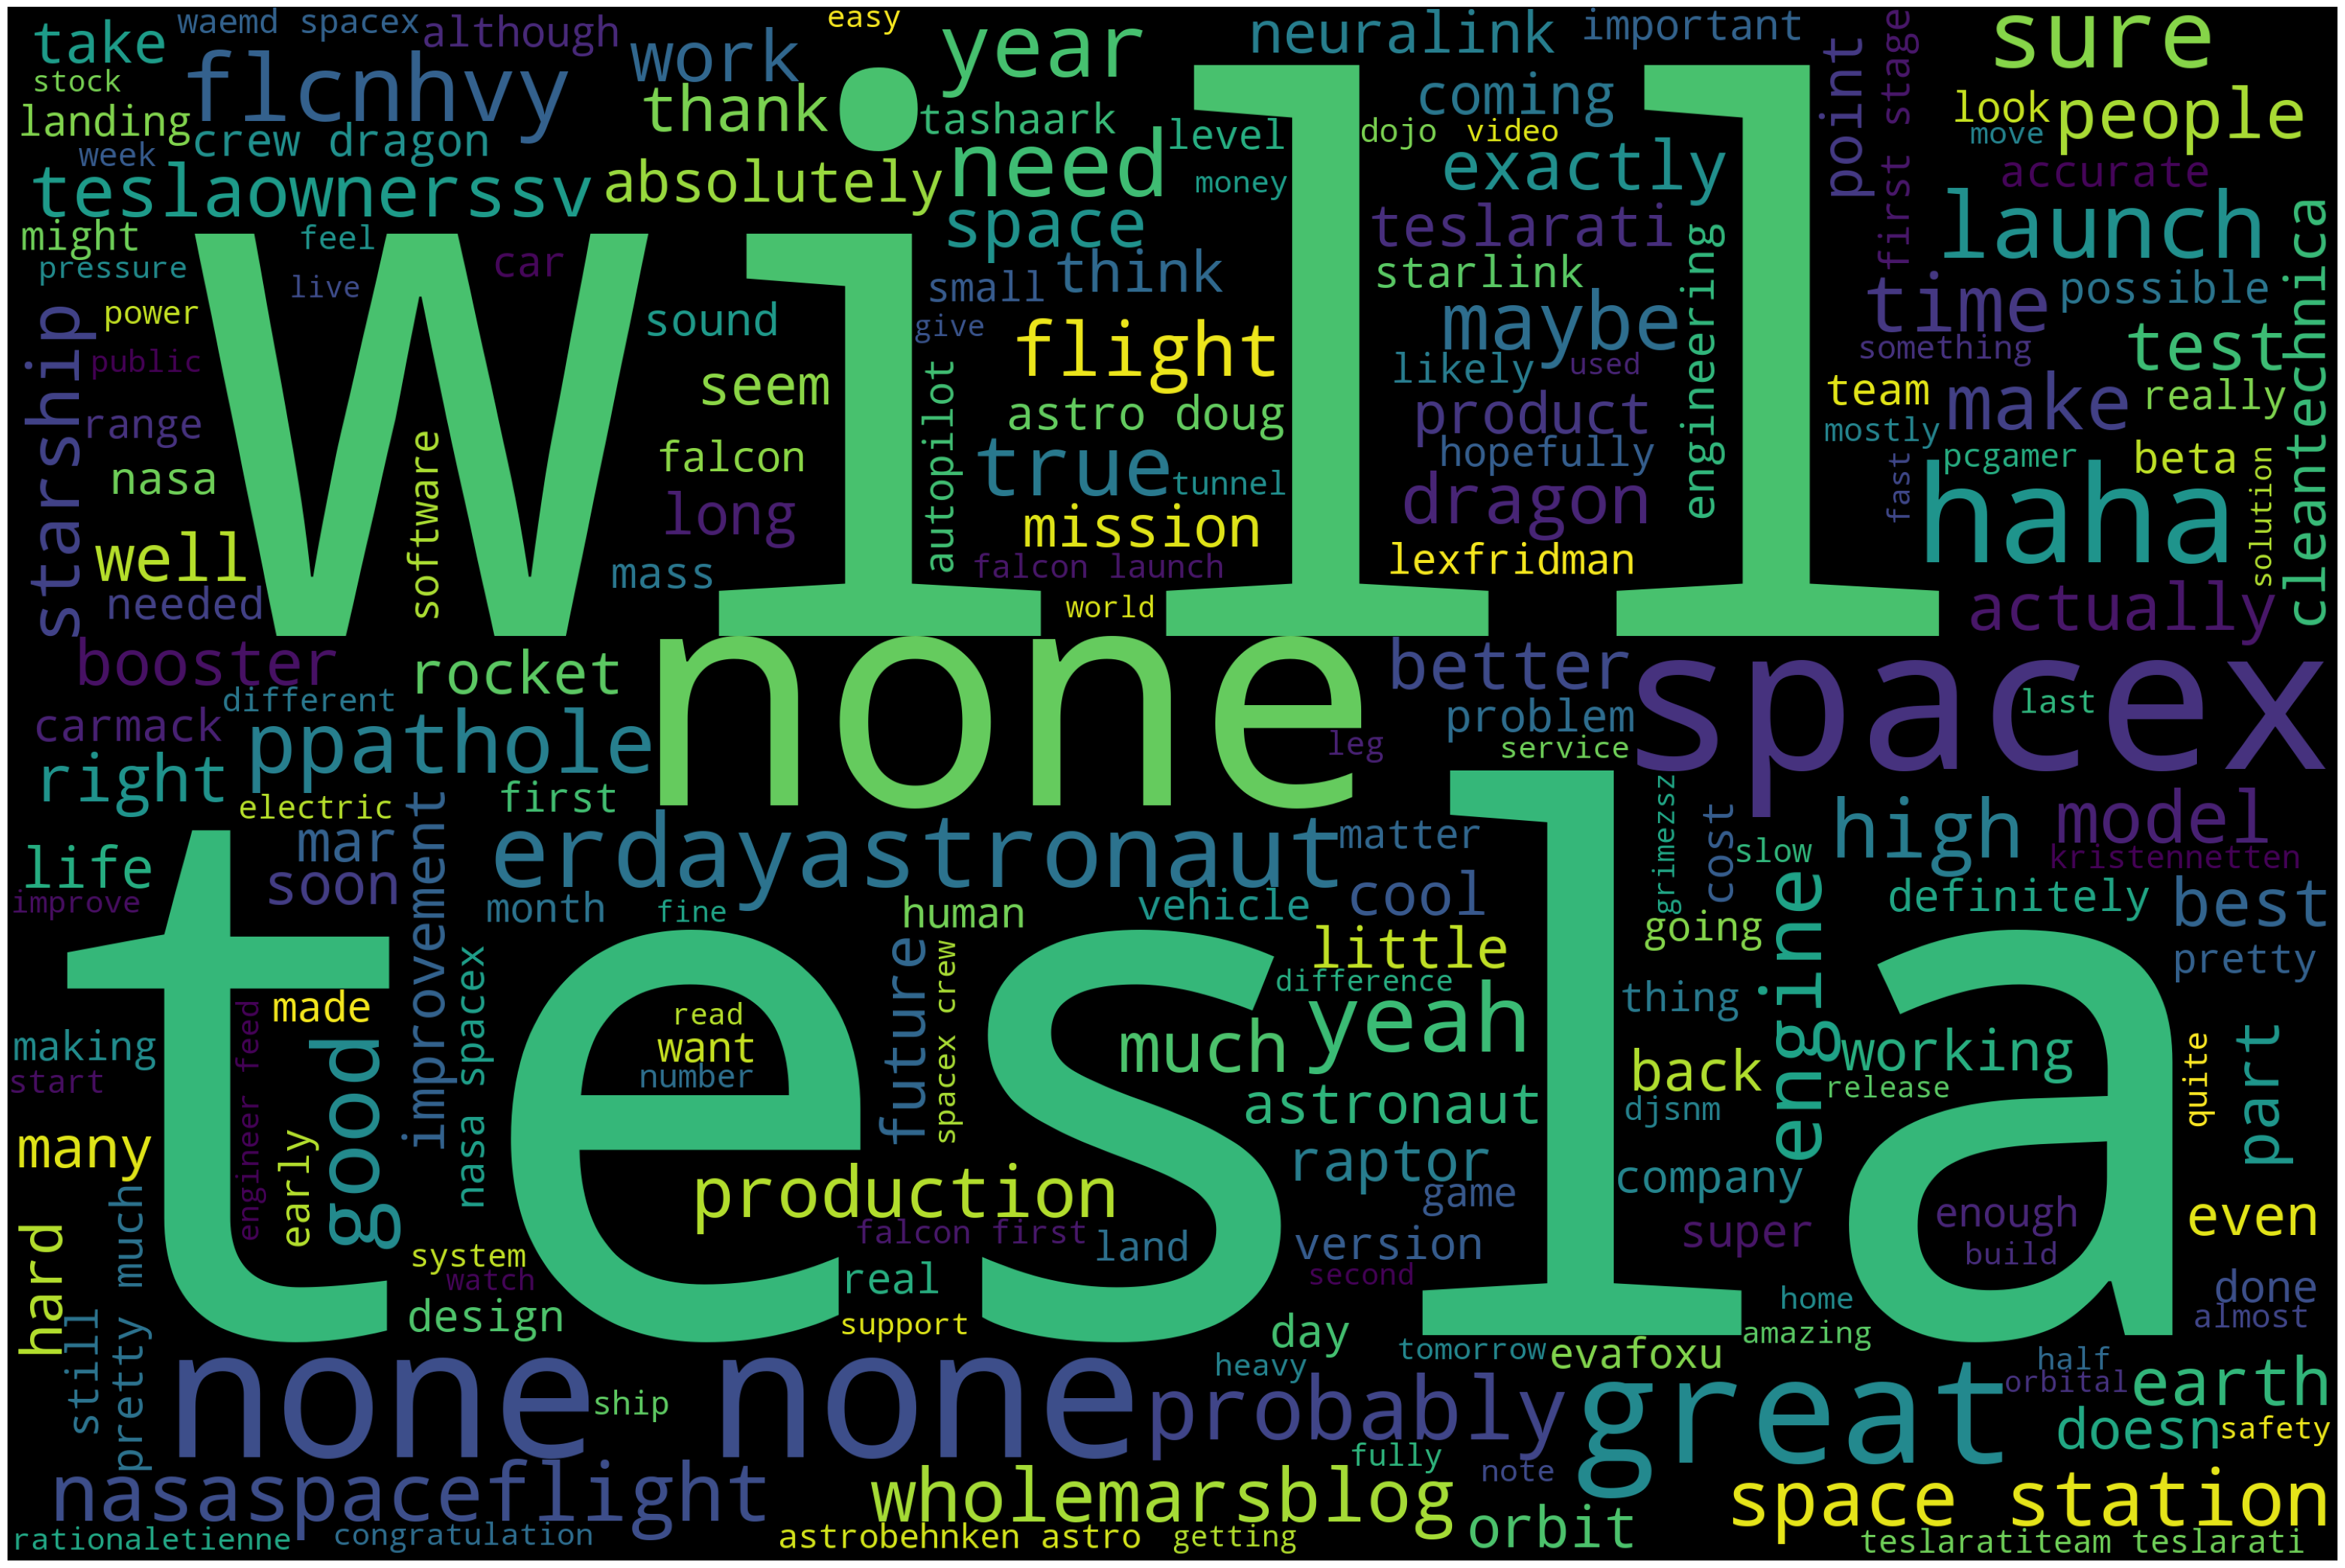

In [120]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black', stopwords = STOPWORDS).generate(tweets)
plt.figure(figsize = (40,30))
plt.imshow(wordcloud)
plt.axis('off')